In [12]:
import numpy as np


class KMeans:
    def __init__(self, K: int, init: np.array):
        self.K = K
        self.cluster_centers_ = init

    def fit(self, X: np.array):
        while True:
            distance = np.empty((self.K, X.shape[0]), dtype=np.float64)
            for i, center in enumerate(self.cluster_centers_):
                distance[i, :] = np.linalg.norm(X - center, axis=1)

            classes = np.argmin(distance, axis=0)
            new_cluster_centers = np.empty(
                self.cluster_centers_.shape, dtype=np.float64
            )

            for k in range(self.K):
                points = X[classes == k, :]
                if points.size != 0:
                    new_cluster_centers[k, :] = np.mean(points, axis=0)
                else:
                    new_cluster_centers[k, :] = self.cluster_centers_[k, :]

            if np.max(np.linalg.norm(new_cluster_centers - self.cluster_centers_, axis=1)) < 0.001:
                self.cluster_centers_ = new_cluster_centers
                break

            self.cluster_centers_ = new_cluster_centers

        return self

    def predict(self, X: np.array):
        distance = np.empty((self.K, X.shape[0]), dtype=np.float64)
        for i, center in enumerate(self.cluster_centers_):
            distance[i, :] = np.linalg.norm(X - center, axis=1)

        return np.argmin(distance, axis=0)

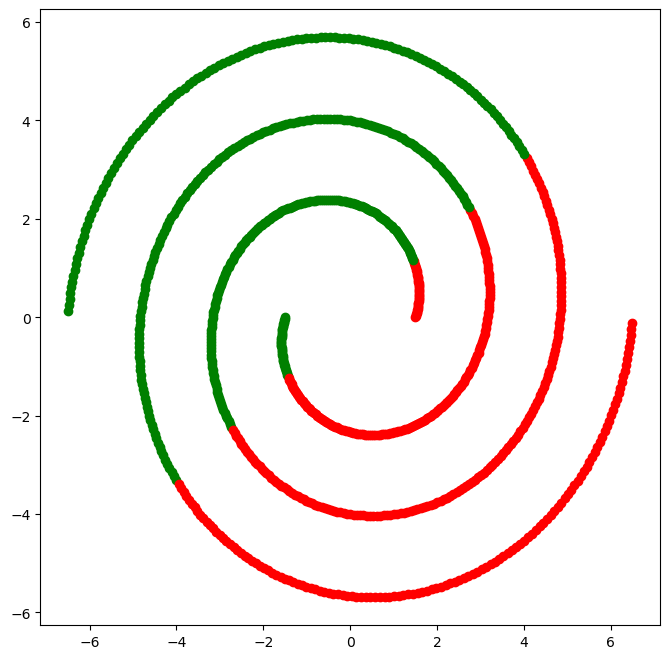

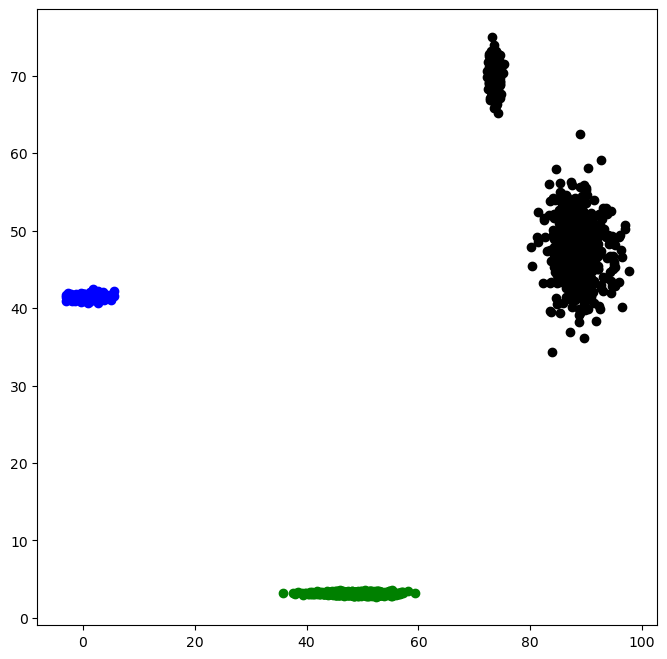

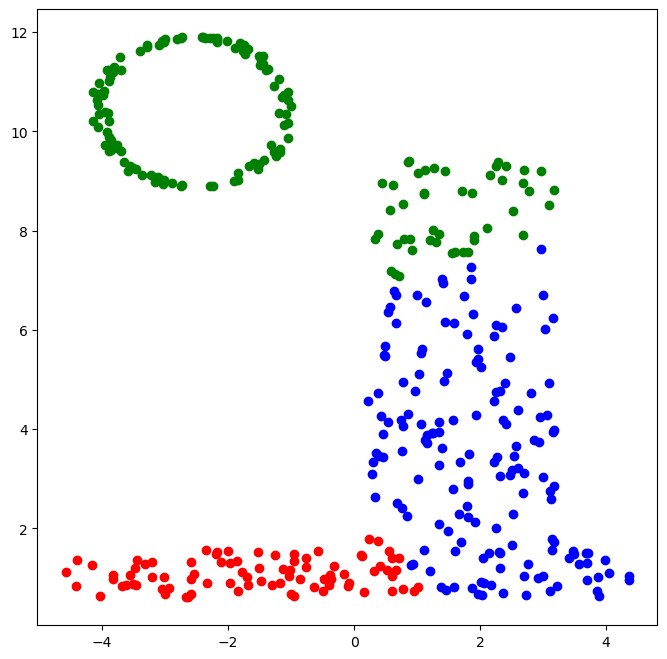

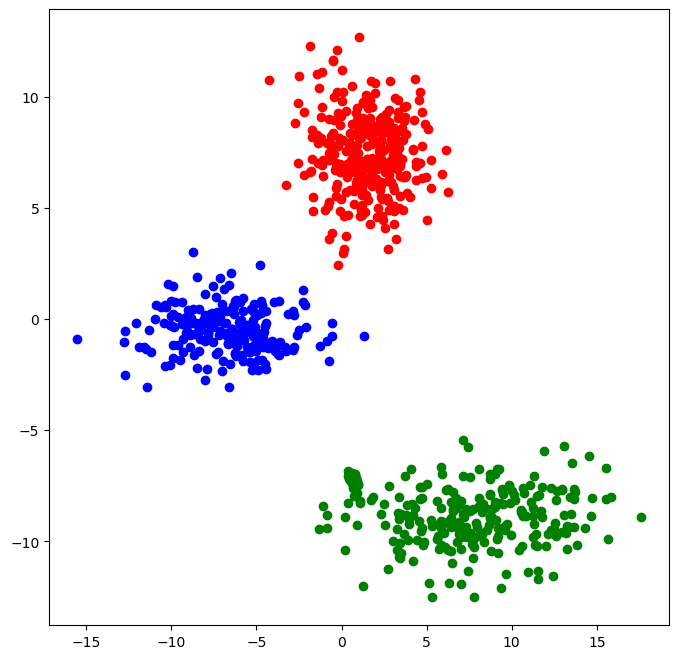

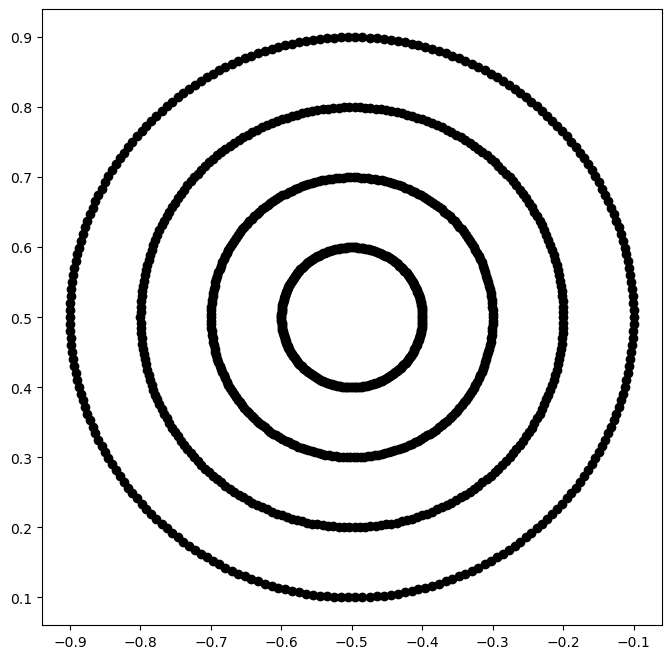

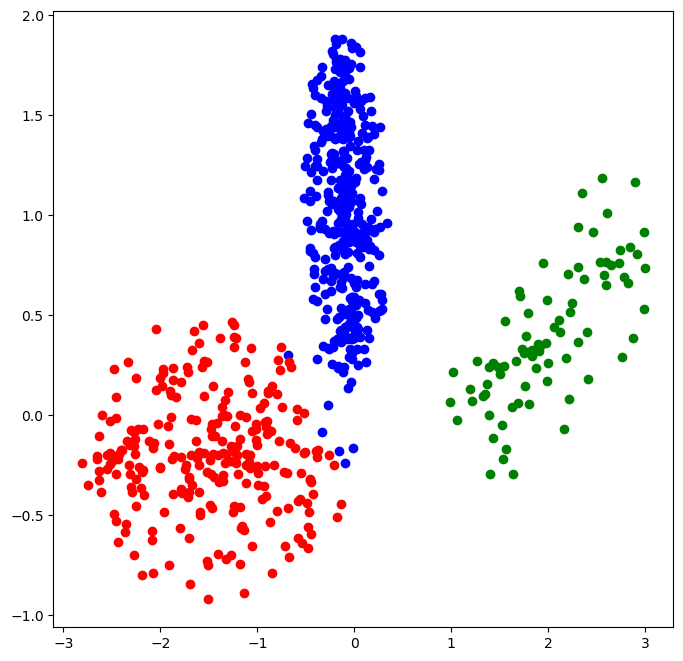

In [13]:
import pandas as pd
from matplotlib import pyplot as plt

colors = ["red", "green", "blue", "black", "yellow"]
for i in range(6):
    df = pd.read_csv(f"datasets\{i + 1}.csv", index_col=None)
    
    X = df[["x", "y"]].to_numpy()
    y = df["class"].to_numpy()
    n_clusters = np.unique(y).shape[0]
    kmeans = KMeans(n_clusters, np.random.randn(n_clusters, 2)).fit(X)
    y_pred = kmeans.predict(X)
    
    plt.figure(figsize=(8, 8))
    for j, x in enumerate(X):
        color = colors[y_pred[j]]
        plt.scatter([x[0]], [x[1]], c=color)